# <span style="color:#336699"><center>AVALIAÇÃO DO INCREMENTO E DIMINUIÇÃO DE ÁREAS AGRÍCOLAS NO NORTE DO RS DIANTE DE ANOMALIAS CLIMÁTICAS</center></span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 100%;">
    Grazieli Rodigheri<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Instituto Nacional de Pesquisas Espaciais (INPE) <br/>
    Divisão de Observação da Terra e Geoinformática (DIOTG) <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> Este é um Jupyter Notebook com o objetivo de avaliar o incremento e diminuição de áreas agrícolas no norte do estado do Rio Grande do Sul utlizando máscaras de cultivo. Para isso, foram utilizadas imagens do projeto Brazil Data Cube (BDC) do produto MOD13Q1 de NDVI e dados do Instituto Brasileiro de Geografia e Estatística (IBGE)</em>.
</div>    

<br/>


<hr style="border: 1px solid #0984e3;">

## **1. INTRODUÇÃO**

<p style="text-align:justify;">
--> O fenômeno El Niño Oscilação Sul (ENOS) tem um impacto significativo nos climas regionais em todo o mundo
    
    
--> Há, portanto, uma possível conexão entre o fenômeno ENOS e a variação da produtividade de alimentos


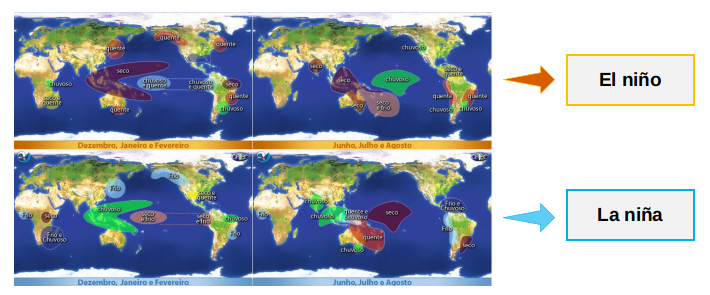
###### Fonte: CPTEC (INPE)

<p style="text-align:justify;">

    
**Verificação de métodos:** Modelar as condições dos cultivos agrícolas e os principais agentes de alterações
    
**Uso sensoriamento remoto:** Proporcionar melhorias na produção de informações agrícolas
    
**Uso de Índices de Vegetação:** Resultados com maior rapidez, precisão e ainda com menor custo operacional


### **1.1 Objetivo**

Avaliar o incremento e diminuição de áreas de soja cultivadas na mesorregião do Noroeste do estado do Rio Grande do Sul, utilizando dados de NDVI (Normalized Difference Vegetation Index) do MODIS, frente a um evento de La Niña ocorrido durante a safra 2010/2011, um ano neutro em 2013/2014 e um ano de El Niño em 2015/2016.


<hr style="border: 1px solid #0984e3;">

## **2. DESENVOLVIMENTO E METODOLOGIA**


### **2.1 Área de estudo**

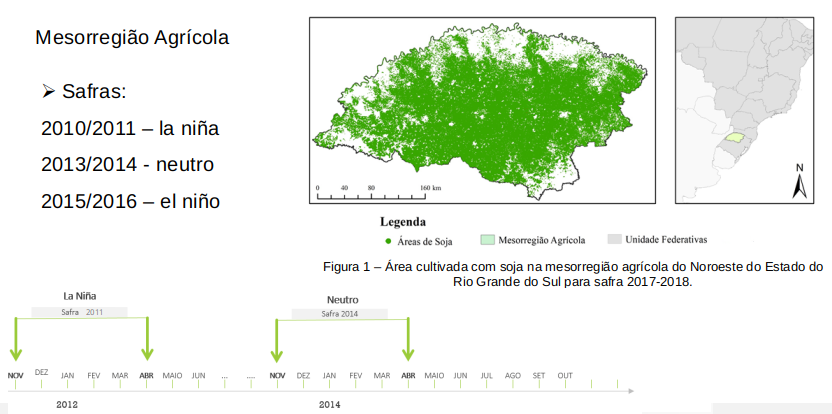

### **2.2 Bibliotecas utilizadas**

In [154]:
# Instala o serviço STAC
!pip install stac.py

# Conexão python com database
!pip install psycopg2

!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [173]:
import stac
import os
from osgeo import gdal, osr
import numpy as np
import psycopg2 as ps
import matplotlib.pyplot as plt
from IPython.display import Image


### **2.3 Obtenção de Imagens**

As imagens utilizadas no trabalho foram obtidas do serviço [**S**patio **T**emporal **A**sset **C**atalog (STAC)](https://stacspec.org/) do BDC. 

In [39]:
# Autentica com o serviço
service = stac.STAC('https://brazildatacube.dpi.inpe.br/stac/', access_token='ylU3VnEqoeK2oAij5Ln3S3FLMLaV7zTYaw64VHqd6N')

In [40]:
# Lista as coleções
service

stac("https://brazildatacube.dpi.inpe.br/stac/")

In [41]:
# Lista a coleção selelcionada
collection = service.collection('MOD13Q1-6')
collection

name,common_name,min,max,nodata,scale,data_type
view_zenith_angle,,0.0,18000.0,-10000.0,0.01,int16
sun_zenith_angle,,0.0,18000.0,-10000.0,0.01,int16
pixel_reliability,quality,0.0,3.0,-1.0,1.0,int16
relative_azimuth_angle,,-18000.0,18000.0,-10000.0,0.01,int16
blue_reflectance,blue,0.0,10000.0,-1000.0,0.0001,int16
red_reflectance,red,0.0,10000.0,-1000.0,0.0001,int16
NIR_reflectance,nir,0.0,10000.0,-1000.0,0.0001,int16
MIR_reflectance,swir22,0.0,10000.0,-1000.0,0.0001,int16
NDVI,NDVI,-2000.0,10000.0,-3000.0,0.0001,int16
EVI,EVI,-2000.0,10000.0,-3000.0,0.0001,int16


As imagens foram obtidas para o período de outubro a abril, que corresponde ao cultivo da soja na região, para os 3 anos de estudo.

In [67]:
# Datas das imagens
Datetimes = ['2010-10-01/2011-04-30', '2013-10-01/2014-04-30', '2015-10-01/2016-04-30',]

# Filtra as imagens para cada data e região
for date in Datetimes:
    items = collection.get_items(
            filter={
                'bbox':'-54.3494,-28.8928,-51.5259,-27.5375',
                'datetime': date,
                'limit':40
            }
    )
    # Baixa a imagem para cada data filtrada
    print(len(items.features))
    for i in range(0,len(items.features)):
        items.features[i].assets['NDVI'].download('Imagens_NDVI')
#         print(items.features[i].assets['NDVI'].href)
        print("Imagem baixada", items.features[i].id)

13
Imagem baixada MOD13Q1.A2011113.h13v11.006.2015218101840
Imagem baixada MOD13Q1.A2011097.h13v11.006.2015218090054
Imagem baixada MOD13Q1.A2011081.h13v11.006.2015217154917
Imagem baixada MOD13Q1.A2011065.h13v11.006.2015217063307
Imagem baixada MOD13Q1.A2011049.h13v11.006.2015216132210
Imagem baixada MOD13Q1.A2011033.h13v11.006.2015216131350
Imagem baixada MOD13Q1.A2011017.h13v11.006.2015216145301
Imagem baixada MOD13Q1.A2011001.h13v11.006.2015216113656
Imagem baixada MOD13Q1.A2010353.h13v11.006.2018226093535
Imagem baixada MOD13Q1.A2010337.h13v11.006.2015213170139
Imagem baixada MOD13Q1.A2010321.h13v11.006.2015213084059
Imagem baixada MOD13Q1.A2010305.h13v11.006.2015213071832
Imagem baixada MOD13Q1.A2010289.h13v11.006.2015211225655
13
Imagem baixada MOD13Q1.A2014113.h13v11.006.2015281101017
Imagem baixada MOD13Q1.A2014097.h13v11.006.2015278233633
Imagem baixada MOD13Q1.A2014081.h13v11.006.2015276220454
Imagem baixada MOD13Q1.A2014065.h13v11.006.2015276172232
Imagem baixada MOD13Q1.A2

Após obtidas, as imagens foram renomeadas para nomes mais simples, facilitando assim o uso destas no desenvolvimento do trabalho.

In [1]:
# Lista de meses das imagens
meses = ['JAN1','JAN2','FEV1','FEV2','MAR1','MAR2','ABR1','ABR2','MAI1','MAI2','JUN1','JUN2','JUL1','JUL2','AGO1','AGO2','SET1','SET2','OUT2','NOV1','NOV2','DEZ1','DEZ2']

# Lista de dias julianos das imagens
dias_jul = ['001','017','033','049','065','081','097','113','129','145','161','177','193','209','225','241','257','273','289','305','321','337','353']

# Função para obter o ano da imagem e o mês
def get_date(filename):
    # Quebra o nome do arquivo nas ocorrências de '.'
    filename_split = filename.split(".")
    # Obtém o ano de aquisição
    year = filename_split[1][1:5]
    # Obtém o dia juliano de aquisição
    juliand = filename_split[1][5:8]
    # Obtém a posição do dia juliano na lista
    index_jd = dias_jul.index(juliand)
    # Obtém o mês de mesmo índice do dia juliano
    month = meses[index_jd]
    # Concatena a data da imagem
    date = year + month
    
    return date


In [100]:
# Caminhos utilizados
shp_path = '/home/grodigheri/git/Trabalho-BDGeo/Shapes/MESO_RS_NE/'
shp_filename = '/home/grodigheri/git/Trabalho-BDGeo/Shapes/MESO_RS_NE/ExportMeso_Output.shp'
path = '/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/'
munic_path = '/home/grodigheri/git/Trabalho-BDGeo/Shapes/Municipios/'

In [2]:
# Lista os arquivos do diretório
files = os.listdir(path)

# Renomeia cada item da pasta 
for filename in files:
    dates = get_date(filename)
    print(dates)
    old_path = path+filename
    new_path = path+dates+'.tif'
    
    os.rename(old_path, new_path)
    
    print("Arquivo ", old_path, " renomeado para ", new_path)

2015DEZ2
Arquivo  /home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/MOD13Q1.A2015353.h13v11.006.2018222150604_NDVI.tif  renomeado para  /home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/2015DEZ2.tif
2011ABR1
Arquivo  /home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/MOD13Q1.A2011097.h13v11.006.2015218090054_NDVI.tif  renomeado para  /home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/2011ABR1.tif
2016FEV1
Arquivo  /home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/MOD13Q1.A2016033.h13v11.006.2016050021641_NDVI.tif  renomeado para  /home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/2016FEV1.tif
2010DEZ2
Arquivo  /home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/MOD13Q1.A2010353.h13v11.006.2018226093535_NDVI.tif  renomeado para  /home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/2010DEZ2.tif
2011JAN2
Arquivo  /home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/MOD13Q1.A2011017.h13v11.006.2015216145301_NDVI.tif  renomeado para  /home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/2011JAN2.tif
2011MAR1
Arquiv

As imagens foram reprojetadas para SIRGAS 2000 (ESPG: 4674), para coincidir com a projeção da shape utilizada, e recortadas para os limites da mesorregião agrícola.

In [3]:
# Lista os arquivos do diretório
files = os.listdir(path)
print(files)

# Abra a imagem, reprojeta e corta ela com a shape da mesorregião
for filename in files:
    name = path + filename
    print(name)
        
    # Abre a imagem que será utilizada
    dataset = gdal.Open(name)

    # # Verifica a projeção de uma imagem MOD13Q1
    # projInfo = dataset.GetProjection()
    # spatialRef = osr.SpatialReference()
    # spatialRef.ImportFromWkt(projInfo)
    # print("Imagem original: " + str(spatialRef))

    # Reprojeta a imagem
    name_repro = path + 'proj' + filename
    print(name_repro)
    dsrep = gdal.Warp(name_repro, 
                        dataset,
                        dstSRS='EPSG:4674') #SIRGAS 2000
    print("Imagem reprojetada: " + str(dsrep.GetProjection()))
    dsrep = None

    # Corta a imagem com a shape
    name_clip = path + 'clip' + filename
    print(name_clip)
    dsclip = gdal.Warp(name_clip, 
                        name_repro, 
                        cutlineDSName = shp_filename, 
                        cropToCutline = True,
                        dstNodata = 0)

    # Fechas as imagens utilizadas
    dsclip = None
    dataset = None

['2016FEV2.tif', '2014ABR1.tif', '2010DEZ2.tif', '2011JAN1.tif', '2016FEV1.tif', '2014MAR2.tif', '2015DEZ2.tif', '2013NOV1.tif', '2010NOV2.tif', '2016JAN1.tif', '2011FEV1.tif', '2016MAR1.tif', '2013NOV2.tif', '2014JAN1.tif', '2015NOV2.tif', '2013DEZ1.tif', '2010OUT2.tif', '2016ABR1.tif', '2016ABR2.tif', '2016MAR2.tif', '2011ABR1.tif', '2011JAN2.tif', '2014MAR1.tif', '2014FEV2.tif', '2014FEV1.tif', '2011ABR2.tif', '2011FEV2.tif', '2014JAN2.tif', '2015OUT2.tif', '2011MAR2.tif', '2010DEZ1.tif', '2016JAN2.tif', '2013OUT2.tif', '2010NOV1.tif', '2013DEZ2.tif', '2011MAR1.tif', '2015DEZ1.tif', '2014ABR2.tif', '2015NOV1.tif']
/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/2016FEV2.tif
/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/proj2016FEV2.tif
Imagem reprojetada: GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],

/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/2015NOV2.tif
/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/proj2015NOV2.tif
Imagem reprojetada: GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4674"]]
/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/clip2015NOV2.tif
/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/2013DEZ1.tif
/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/proj2013DEZ1.tif
Imagem reprojetada: GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","91

/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/2011MAR2.tif
/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/proj2011MAR2.tif
Imagem reprojetada: GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4674"]]
/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/clip2011MAR2.tif
/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/2010DEZ1.tif
/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/proj2010DEZ1.tif
Imagem reprojetada: GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","91

### **2.4 Importação das imagens e shapes para o database**

In [16]:
# Lista os arquivos do diretório e selciona apenas aqueles com 'clip' no nome
files = os.listdir(path)
files_clip = [f for f in files if 'clip' in f]
print(files_clip)

# Muda o diretório
os.chdir(path)

# Geração do sql e importação das imagens no database
for filename in files_clip:
    print('--------------------------------------------------------')
    name_stif = filename[0:12]
    print(name_stif)

    # Gera o sql
    cmd1 = 'raster2pgsql -I -C -M -s 4674 ' + filename + ' -t 100x100 public.' + name_stif + ' > ' + name_stif +'.sql'
    print(cmd1)
    os.system(cmd1)
    
    # Adiciona no banco
    cmd2 = 'PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f ' + name_stif +'.sql'
    print(cmd2)
    os.system(cmd2)


['clip2010NOV1.tif', 'clip2015DEZ1.tif', 'clip2010DEZ2.tif', 'clip2011FEV1.tif', 'clip2011JAN2.tif', 'clip2014JAN2.tif', 'clip2015NOV1.tif', 'clip2010DEZ1.tif', 'clip2013OUT2.tif', 'clip2013NOV1.tif', 'clip2016FEV2.tif', 'clip2011ABR1.tif', 'clip2016JAN1.tif', 'clip2016JAN2.tif', 'clip2013DEZ2.tif', 'clip2014JAN1.tif', 'clip2013NOV2.tif', 'clip2015DEZ2.tif', 'clip2016ABR2.tif', 'clip2014MAR2.tif', 'clip2011FEV2.tif', 'clip2014FEV1.tif', 'clip2016FEV1.tif', 'clip2011MAR1.tif', 'clip2016MAR2.tif', 'clip2014ABR2.tif', 'clip2013DEZ1.tif', 'clip2010NOV2.tif', 'clip2011JAN1.tif', 'clip2011MAR2.tif', 'clip2014MAR1.tif', 'clip2011ABR2.tif', 'clip2015OUT2.tif', 'clip2014FEV2.tif', 'clip2016MAR1.tif', 'clip2010OUT2.tif', 'clip2016ABR1.tif', 'clip2014ABR1.tif', 'clip2015NOV2.tif']
--------------------------------------------------------
clip2010NOV1
raster2pgsql -I -C -M -s 4674 clip2010NOV1.tif -t 100x100 public.clip2010NOV1 > clip2010NOV1.sql
PGPASSWORD=secreto psql -U postgres -h localhost -p 

--------------------------------------------------------
clip2011MAR2
raster2pgsql -I -C -M -s 4674 clip2011MAR2.tif -t 100x100 public.clip2011MAR2 > clip2011MAR2.sql
PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f clip2011MAR2.sql
--------------------------------------------------------
clip2014MAR1
raster2pgsql -I -C -M -s 4674 clip2014MAR1.tif -t 100x100 public.clip2014MAR1 > clip2014MAR1.sql
PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f clip2014MAR1.sql
--------------------------------------------------------
clip2011ABR2
raster2pgsql -I -C -M -s 4674 clip2011ABR2.tif -t 100x100 public.clip2011ABR2 > clip2011ABR2.sql
PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f clip2011ABR2.sql
--------------------------------------------------------
clip2015OUT2
raster2pgsql -I -C -M -s 4674 clip2015OUT2.tif -t 100x100 public.clip2015OUT2 > clip2015OUT2.sql
PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d

In [12]:
# Muda o diretório para shape da mesmo
os.chdir(shp_path)

# Gera o sql e adiciona no banco
cmd1 = 'shp2pgsql -c -g "geom" -s 4674 -i -I -t "2D" -W UTF-8 ExportMeso_Output.shp public.ExportMeso_Output > ExportMeso_Output.sql'
print(cmd1)
os.system(cmd1)

cmd2 = 'PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f ExportMeso_Output.sql'
print(cmd2)
os.system(cmd2)

shp2pgsql -c -g "geom" -s 4674 -i -I -t "2D" -W UTF-8 ExportMeso_Output.shp public.ExportMeso_Output > ExportMeso_Output.sql
PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f ExportMeso_Output.sql


0

In [19]:
# Muda o diretório para shape dos municípios
os.chdir(munic_path)

# Gera o sql e adiciona no banco
cmd1 = 'shp2pgsql -c -g "geom" -s 4674 -i -I -t "2D" -W UTF-8 43MUE250GC_SIR.shp public.shp_munic > shp_munic.sql'
print(cmd1)
os.system(cmd1)

cmd2 = 'PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f shp_munic.sql'
print(cmd2)
os.system(cmd2)

shp2pgsql -c -g "geom" -s 4674 -i -I -t "2D" -W UTF-8 43MUE250GC_SIR.shp public.shp_munic > shp_munic.sql
PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f shp_munic.sql


0

### **2.5 Geração das máscaras de cultivo**

Para a geração das máscaras de cultivo em cada ano de estudo foi utilizada a metodologia proposta por Fontana et al. (1998). Tal metodologia considera a diferença dos valores de NDVI desde estádio vegetativo até o estádio de pleno desenvolvimento da soja.

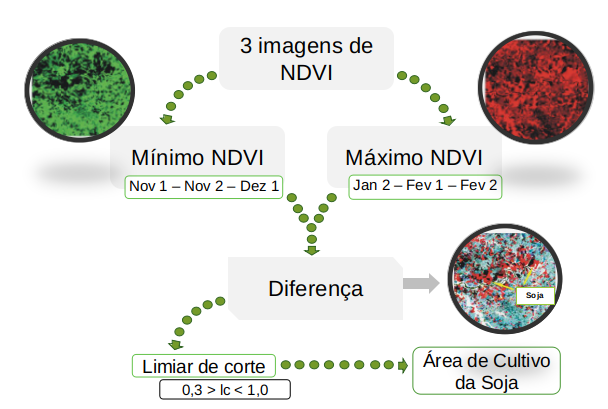

#### **2.5.1 Geração das imagens de mínimo e máximo**

In [34]:
# Muda o diretório para as imagens
os.chdir(path)

# Gera as imagens de mínimo para os 3 anos de estudo
os.system('gdal_calc.py -A clip2010NOV1.tif -B clip2010NOV2.tif -C clip2010DEZ1.tif --outfile=min2010.tif --calc="numpy.min((A,B,C),axis=0)"')
os.system('gdal_calc.py -A clip2013NOV1.tif -B clip2013NOV2.tif -C clip2013DEZ1.tif --outfile=min2013.tif --calc="numpy.min((A,B,C),axis=0)"')
os.system('gdal_calc.py -A clip2015NOV1.tif -B clip2015NOV2.tif -C clip2015DEZ1.tif --outfile=min2015.tif --calc="numpy.min((A,B,C),axis=0)"')

# Gera as imagens de máximo para os 3 anos de estudo
os.system('gdal_calc.py -A clip2011JAN2.tif -B clip2011FEV1.tif -C clip2011FEV2.tif --outfile=max2011.tif --calc="numpy.max((A,B,C),axis=0)"')
os.system('gdal_calc.py -A clip2014JAN2.tif -B clip2014FEV1.tif -C clip2014FEV1.tif --outfile=max2014.tif --calc="numpy.max((A,B,C),axis=0)"')
os.system('gdal_calc.py -A clip2016JAN2.tif -B clip2016FEV1.tif -C clip2016FEV1.tif --outfile=max2016.tif --calc="numpy.max((A,B,C),axis=0)"')

0

#### **2.5.2 Geração das imagens diferença**

In [49]:
# Gera as imagens de máximo para os 3 anos de estudo
os.system('gdal_calc.py -A max2011.tif -B min2010.tif --outfile=dif2010.tif --calc="A-B"')
os.system('gdal_calc.py -A max2014.tif -B min2013.tif --outfile=dif2013.tif --calc="A-B"')
os.system('gdal_calc.py -A max2016.tif -B min2015.tif --outfile=dif2015.tif --calc="A-B"')

0

#### **2.5.3 Geração das máscaras**

As máscaras foram geradas ajustando-se os threshold de cada imagem de modo que a área gerada fosse similar a área de soja cultivada disponibilizada pelo levantamento sistemático do IBGE de 2018.

In [85]:
# Função para obter a área da máscara em função do threshold
def area_masc (tif, min_tsh, max_tsh):
    raster = gdal.Open(tif)
    array = np.array(raster.GetRasterBand(1).ReadAsArray())
    
    # Conta quantos elementos não nulos
    all_pixels_count = np.count_nonzero(array)
    print(f'all_pixels_count: {all_pixels_count}')
    
    # Conta quantos elementos dentro do threshold
    interval_pixels_count = np.count_nonzero((array > min_tsh) & (array < max_tsh))
    print(f'interval_pixels_count: {interval_pixels_count}')

    print(f"Isso dá {interval_pixels_count/all_pixels_count*100} %")
    
    # Calcula a área (ha)
    area = interval_pixels_count * 6.25
    print(f'area = {area}')
    print('------------------------------------------------')
    
# Chama a função e passa os parâmetros
area_masc (path + 'dif2010.tif', 4850, 6480)
area_masc (path + 'dif2013.tif', 4700, 6500)
area_masc (path + 'dif2015.tif', 4750, 6550)


all_pixels_count: 3152120
interval_pixels_count: 443883
Isso dá 14.082046368793065 %
area = 2774268.75
------------------------------------------------
all_pixels_count: 3151935
interval_pixels_count: 452224
Isso dá 14.347503993578547 %
area = 2826400.0
------------------------------------------------
all_pixels_count: 3148652
interval_pixels_count: 467981
Isso dá 14.862900060089206 %
area = 2924881.25
------------------------------------------------


In [87]:
# Gera a máscara com os threshold definidos
os.system('gdal_calc.py -A dif2010.tif --outfile=masc2010.tif --calc="A*logical_and(A>4850,A<6480)" --NoDataValue=0')
os.system('gdal_calc.py -A dif2013.tif --outfile=masc2013.tif --calc="A*logical_and(A>4700,A<6500)" --NoDataValue=0')
os.system('gdal_calc.py -A dif2015.tif --outfile=masc2015.tif --calc="A*logical_and(A>4750,A<6550)" --NoDataValue=0')

0

In [92]:
# Vetorização da máscara
os.system('gdal_polygonize.py ' + path + 'masc2010.tif -f "ESRI Shapefile" masc2010.shp')
os.system('gdal_polygonize.py ' + path + 'masc2013.tif -f "ESRI Shapefile" masc2013.shp')
os.system('gdal_polygonize.py ' + path + 'masc2015.tif -f "ESRI Shapefile" masc2015.shp')

0

#### **2.5.4 Importação das máscaras no database**

In [96]:
os.chdir(path)

# Gera o sql e adiciona no banco
os.system('shp2pgsql -c -g "geom" -s 4674 -i -I -t "2D" -W UTF-8 masc2010.shp public.masc2010 > masc2010.sql')
os.system('shp2pgsql -c -g "geom" -s 4674 -i -I -t "2D" -W UTF-8 masc2013.shp public.masc2013 > masc2013.sql')
os.system('shp2pgsql -c -g "geom" -s 4674 -i -I -t "2D" -W UTF-8 masc2015.shp public.masc2015 > masc2015.sql')

os.system('PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f masc2010.sql')
os.system('PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f masc2013.sql')
os.system('PGPASSWORD=secreto psql -U postgres -h localhost -p 5432 -d trabalhobd -f masc2015.sql')

0

### **2.6 Avaliações de incremento e diminuição de áreas agrícolas**

Para avaliar as áreas que aumentaram ou diminuiram nos diferentes anos de anomalias foram feitas consultados no banco de dados, avaliando, principalmente, a diferença na área total da mesorregião. Além disso, outras consultas foram feitas para verificar os municípios com maior produção dentro da mesorregião.

<hr style="border: 1px solid #0984e3;">

## **3. RESULTADOS E DISCUSSÕES**

### **3.1 Conexão com o database**

In [174]:
# Tenta fazer a conexão com o banco
try:
    conn = ps.connect("dbname='trabalhobd' user='postgres' host='localhost' password='secreto'")
    conn.set_session(autocommit=True) #if you want your updates to take effect without being in a transaction and requiring a commit, for a beginner, I would set this to True
    print("Successful")
except:
    print ("I am unable to connect to the database")


Successful


#### Testa conexão com o banco através da consulta dos nomes de alguns dos municípios do RS:

In [140]:
cur = conn.cursor()
cur.execute("SELECT nm_municip FROM shp_munic LIMIT 20")
res = cur.fetchall()
for r in res:
    print(r)

('LAGOA MIRIM',)
('ACEGUÁ',)
('ÁGUA SANTA',)
('ALECRIM',)
('ALEGRETE',)
('AGUDO',)
('AMETISTA DO SUL',)
('AJURICABA',)
('ALEGRIA',)
('ALMIRANTE TAMANDARÉ DO SUL',)
('ALTO ALEGRE',)
('ALPESTRE',)
('AMARAL FERRADOR',)
('BARRA FUNDA',)
('ANTA GORDA',)
('ARAMBARÉ',)
('SILVEIRA MARTINS',)
('ARATIBA',)
('ARROIO DO MEIO',)
('ARVOREZINHA',)


### Cria índices para as tabelas (shapes) do banco

In [110]:
cur = conn.cursor()
cur.execute("CREATE INDEX munic_idx ON shp_munic USING GIST(geom);")
cur.execute("CREATE INDEX masc2010_idx ON masc2010 USING GIST(geom);")
cur.execute("CREATE INDEX masc2013_idx ON masc2013 USING GIST(geom);")
cur.execute("CREATE INDEX masc2015_idx ON masc2015 USING GIST(geom);")
cur.execute("CREATE INDEX meso_idx ON exportmeso_output USING GIST(geom);")

### **3.2 Avaliação das áreas de soja plantadas na mesorregião**

#### **3.2.1 Percentual de área plantada nos anos de estudo**

In [135]:
# Consulta 1: Qual a porcentagem de area agricola em relação à mesorregião em 2010?
    
cur = conn.cursor()
cur.execute(
    "SELECT (SUM(ST_Area(masc.geom))/ST_Area(meso.geom))*100 AS Percentual " +
    "FROM exportmeso_output as meso, masc2010 as masc " +
    "GROUP BY meso.geom;")
res1_2010 = cur.fetchall()

print("-------------------------------------------------")
print("Percentual de áreas plantadas em 2010:")
print("-------------------------------------------------")
print(res1_2010)

-------------------------------------------------
Percentual de áreas plantadas em 2010:
-------------------------------------------------
[(24.101534446878624,)]


In [136]:
# Consulta 2: Qual a porcentagem de area agricola em relação à mesorregião em 2013?
    
cur = conn.cursor()
cur.execute(
    "SELECT (SUM(ST_Area(masc.geom))/ST_Area(meso.geom))*100 AS Percentual " +
    "FROM exportmeso_output as meso, masc2013 as masc " +
    "GROUP BY meso.geom;")
res1_2013 = cur.fetchall()

print("-------------------------------------------------")
print("Percentual de áreas plantadas em 2013:")
print("-------------------------------------------------")
print(res1_2013)

-------------------------------------------------
Percentual de áreas plantadas em 2013:
-------------------------------------------------
[(24.554426084583405,)]


In [137]:
# Consulta 3: Qual a porcentagem de area agricola em relação à mesorregião em 2015?

cur = conn.cursor()
cur.execute(
    "SELECT (SUM(ST_Area(masc.geom))/ST_Area(meso.geom))*100 AS Percentual " +
    "FROM exportmeso_output as meso, masc2015 as masc " +
    "GROUP BY meso.geom;")
res1_2015 = cur.fetchall()

print("-------------------------------------------------")
print("Percentual de áreas plantadas em 2015:")
print("-------------------------------------------------")
print(res1_2015)

-------------------------------------------------
Percentual de áreas plantadas em 2015:
-------------------------------------------------
[(25.409984594998914,)]


In [166]:
Image(url= "grafico.png", width=600, height=400)

### Plot das imagens diferença (El Niño / La Niña)

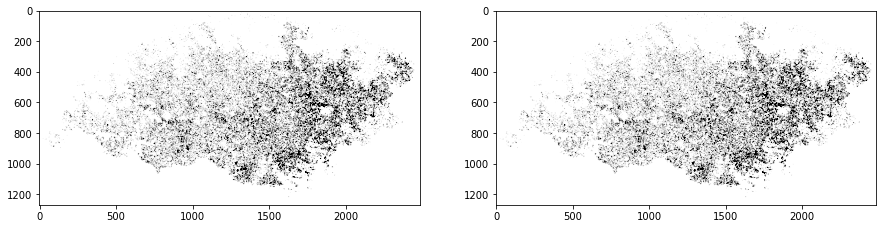

In [193]:
import matplotlib
tiff1_path = '/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/diff_nina.tif'
tiff2_path = '/home/grodigheri/git/Trabalho-BDGeo/Imagens_NDVI/diff_nino.tif'

img1 = plt.imread(tiff1_path)
img2 = plt.imread(tiff2_path)

cmap_reversed = matplotlib.cm.get_cmap('Greys_r').reversed()

vmin = 0
vmax = 70

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
ax1.imshow(img[:, :, 0], cmap=cmap_reversed, vmin=vmin, vmax=vmax)
ax2.imshow(img[:, :, 0], cmap=cmap_reversed, vmin=vmin, vmax=vmax)
plt.show()

### **3.3 Avaliação das áreas de soja nos municípios da mesorregião**

In [127]:
# Consulta 1: Quais os municipios com maior área plantada em 2010?

cur = conn.cursor()
cur.execute(
    "SELECT 111*111*SUM(ST_Area(masc.geom)) AS Area, m.nm_municip " +
    "FROM shp_munic as m, masc2010 as masc " +
    "WHERE ST_Intersects(masc.geom, m.geom) " +
    "GROUP BY m.nm_municip " +
    "ORDER BY Area DESC " +
    "LIMIT 15;")
res2_2010 = cur.fetchall()

print("-------------------------------------------------")
print("Áreas agrícolas em 2010 (em km²):")
print("-------------------------------------------------")
for r in res2_2010:
    print(r)

-------------------------------------------------
Áreas agrícolas em 2010 (em km²):
-------------------------------------------------
(598.0155803614454, 'CRUZ ALTA')
(540.4534371880058, 'PALMEIRA DAS MISSÕES')
(515.624274182535, 'SANTA BÁRBARA DO SUL')
(494.22808226786276, 'JÓIA')
(375.39139695071395, 'PASSO FUNDO')
(344.6543302076146, 'SÃO MIGUEL DAS MISSÕES')
(336.271493823133, 'CARAZINHO')
(329.76481605803485, 'FORTALEZA DOS VALOS')
(326.45159977273346, 'CHAPADA')
(324.8947873013383, 'ESPUMOSO')
(320.1844316186321, 'GIRUÁ')
(314.83538363997604, 'BOA VISTA DO CADEADO')
(310.7238019847218, 'SÃO LUIZ GONZAGA')
(309.60609046678974, 'IJUÍ')
(300.10554256436967, 'IBIRUBÁ')


In [128]:
# Consulta 2: Quais os municipios com maior área plantada em 2013?

cur = conn.cursor()
cur.execute(
    "SELECT 111*111*SUM(ST_Area(masc.geom)) AS Area, m.nm_municip " +
    "FROM shp_munic as m, masc2013 as masc " +
    "WHERE ST_Intersects(masc.geom, m.geom) " +
    "GROUP BY m.nm_municip " +
    "ORDER BY Area DESC " +
    "LIMIT 15;")
res2_2013 = cur.fetchall()

print("-------------------------------------------------")
print("Áreas agrícolas em 2013 (em km²):")
print("-------------------------------------------------")
for r in res2_2013:
    print(r)

-------------------------------------------------
Áreas agrícolas em 2013 (em km²):
-------------------------------------------------
(620.9685847475201, 'CRUZ ALTA')
(528.9569758607134, 'PALMEIRA DAS MISSÕES')
(501.7726350138967, 'JÓIA')
(400.8193339836353, 'SANTA BÁRBARA DO SUL')
(382.2174208637838, 'SÃO MIGUEL DAS MISSÕES')
(352.19888295364234, 'PASSO FUNDO')
(349.20501281633824, 'SÃO LUIZ GONZAGA')
(332.91835926934255, 'BOA VISTA DO CADEADO')
(327.7689026331645, 'ESPUMOSO')
(319.14655663769406, 'GIRUÁ')
(310.2847010312411, 'SOLEDADE')
(302.1812925262498, 'BOA VISTA DO INCRA')
(301.4228454248002, 'IJUÍ')
(300.86398966583033, 'FORTALEZA DOS VALOS')
(285.45553802577837, 'MARAU')


In [129]:
# Consulta 3: Quais os municipios com maior área plantada em 2015?

cur = conn.cursor()
cur.execute(
    "SELECT 111*111*SUM(ST_Area(masc.geom)) AS Area, m.nm_municip " +
    "FROM shp_munic as m, masc2015 as masc " +
    "WHERE ST_Intersects(masc.geom, m.geom) " +
    "GROUP BY m.nm_municip " +
    "ORDER BY Area DESC " +
    "LIMIT 15;")
res2_2015 = cur.fetchall()

print("-------------------------------------------------")
print("Áreas agrícolas em 2015 (em km²):")
print("-------------------------------------------------")
for r in res2_2015:
    print(r)

-------------------------------------------------
Áreas agrícolas em 2015 (em km²):
-------------------------------------------------
(650.3085120932108, 'CRUZ ALTA')
(615.6594550373483, 'PALMEIRA DAS MISSÕES')
(562.288730056151, 'JÓIA')
(492.9506976759302, 'SANTA BÁRBARA DO SUL')
(419.50108364048776, 'SÃO MIGUEL DAS MISSÕES')
(372.3176902763964, 'PASSO FUNDO')
(360.1825366531554, 'ESPUMOSO')
(355.9911184609192, 'GIRUÁ')
(347.92762822439556, 'SÃO LUIZ GONZAGA')
(345.7720417255424, 'BOA VISTA DO CADEADO')
(322.1404267750089, 'FORTALEZA DOS VALOS')
(319.50582105416487, 'CHAPADA')
(317.0308884073299, 'CARAZINHO')
(299.4269319999161, 'SOLEDADE')
(297.0318358900651, 'BOA VISTA DO INCRA')


<hr style="border: 1px solid #0984e3;">

## **4. CONCLUSÃO**

A utilização de máscaras de cultivo permite uma avaliação do incremento ou diminuição das áreas de soja na região, em anos com diferentes condições meteorológicas. Além disso, o uso das máscaras junto com dados estatísticos levantados pelo IBGE corrobora nas análises, ajudando a  inferir sobre as principais mudanças na área e na produção agrícola da região.

No entanto, para uma avaliação mais consistente da influência das anomalias climáticas nas áreas de produção agrícola podem ser utilizados dados meteorológicos obtidos através do sensoriamento remoto.